In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
dataset=pd.read_csv(r'/content/drive/MyDrive/ml datasets/Salary.csv')
print(dataset)

      Years of Experience  Salary
0                       0    1036
1                       0    1041
2                       0    1054
3                       0    1069
4                       0    1110
...                   ...     ...
4995                   29   99841
4996                   29   99934
4997                   29   99940
4998                   29   99941
4999                   29   99980

[5000 rows x 2 columns]


In [147]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [149]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
pred = lr.predict(X_test)

In [151]:
k = 5
kf = KFold(n_splits=5, random_state=None)
model = LinearRegression()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = r2_score(pred_values , y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
 
print('Accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Accuracy of each fold - [0.9499925931720771, 0.9678740356424723, 0.9490580628846396, 0.9460286413842853, 0.966294213463546]
Avg accuracy : 0.9558495093094042


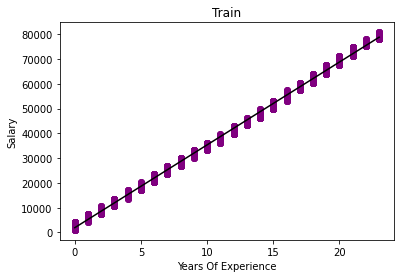

In [152]:
plt.scatter(X_train,y_train,color='purple')
plt.plot(X_train ,lr.predict(X_train),color='black')
plt.title('Train')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()